過学習の確認

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(23)
M, N = 80, 32
# ダミーデータ
X = np.random.randn(M, N)#標準正規分布の乱数をM行N列作成
y = X.sum(1) * 0.4 + np.random.randn(M)

In [2]:
#説明変数の数を変えて評価
res1,res2 = [],[]
nums = [1,2,4,8,12,16,20,28,32]#説明変数の数

for num in nums:
    lst1,lst2 = [],[]
    for i in range(20):#20回の平均を取る
        X_train,X_test,y_train,y_test = (
        train_test_split(X,y,test_size=M//2,random_state=i))
        lr = LinearRegression().fit(X_train[:,:num],y_train)
        lst1.append(mean_squared_error(y_train,lr.predict(X_train[:,:num])))
        lst2.append(mean_squared_error(y_test,lr.predict(X_test[:,:num])))
    res1.append(np.mean(lst1))
    res2.append(np.mean(lst2))

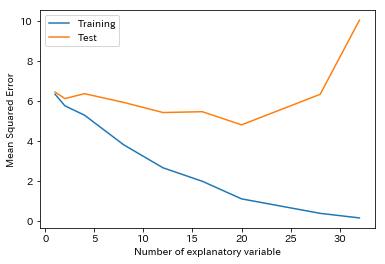

In [3]:
# グラフで比較
plt.xlabel('Number of explanatory variable')
plt.ylabel('Mean Squared Error')
plt.plot(nums, res1, label='Training')
plt.plot(nums, res2, label='Test')
plt.legend();